## Testing Modules 

In [2]:
import Cmodules
import Fmodules
import Pymodules
#from toolsWaves import smooth7
from numpy import *

In [3]:
n = 100
k = 0.1
d = random.random(n)
b = random.random(n)
x = random.random(n)
dx = x[1]-x[0]
w_map = random.random((n/2,n))
u = random.random(n)*10
h = 0.1
kap0 = d
kaph = b

In [5]:
#w_map

In [6]:
size(u)
#print(u)
#print(u[1:n])

100

In [7]:
mask=zeros_like(w_map)

In [8]:
mask[w_map>0.1]=1
mask[w_map<=0.1]=0
print mask

[[ 1.  1.  1. ...,  0.  0.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  0.]
 [ 1.  1.  1. ...,  1.  0.  1.]
 [ 1.  0.  1. ...,  1.  1.  1.]]


In [9]:
len('/Users/Leo/Desktop/MasterThesis/PopulationDynamics/Code/Wecd sleyCode/mapsimleo/world_100x50.txt')

96

In [10]:
#mask=Fmodules.readfromfile('world_100x50.txt',100,50)
mask=Fmodules.genfromtxt('maps/MAPS100x150/world_100x50.txt',100,50)

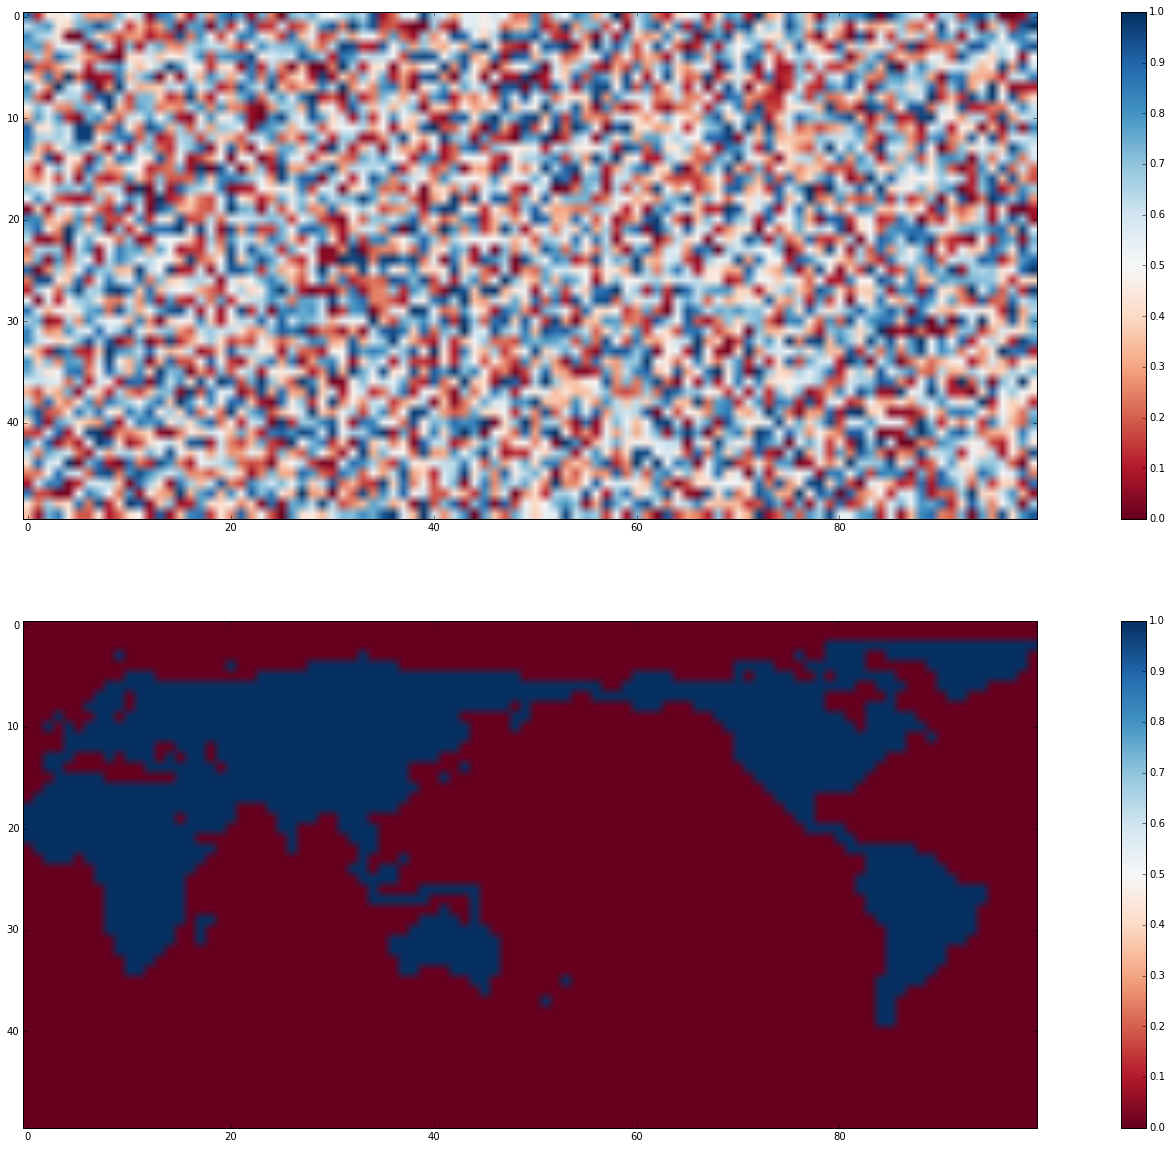

In [11]:
% matplotlib inline
from  matplotlib import pyplot 
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(211)
im = pyplot.imshow(w_map, cmap = cm.RdBu)
cb = pyplot.colorbar()
cb.set_clim(0.0,1.0)

pyplot.subplot(212)
im = pyplot.imshow(mask, cmap = cm.RdBu)
cb = pyplot.colorbar()
cb.set_clim(0.0,1.0)

In [12]:
from toolsWaves import Xscan, Yscan
nxscanPy, xstartPy, xendPy=Xscan(mask)
nyscanPy, ystartPy, yendPy=Yscan(mask)

In [13]:
print xstartPy.size
print xendPy.size
#print xstart_size
#print xend_size

149
148


In [14]:
xstart_size, xend_size=Fmodules.alloc_xscan(mask)
ystart_size, yend_size=Fmodules.alloc_yscan(mask)
nxscan, xstart, xend=Fmodules.xscan(mask,xstart_size,xend_size)
nyscan, ystart, yend=Fmodules.yscan(mask,ystart_size,yend_size)

In [15]:
print ystartPy.size
print yendPy.size
print ystart_size
print yend_size

199
199
199
199


In [16]:
print 'nxscan:',sum((nxscanPy-nxscan)**2)
print 'Xstart:',sum((xstartPy-xstart)**2)
print 'Xend:',sum((xendPy-xend)**2)

nxscan: 0
Xstart: 0
Xend: 0


In [17]:
print 'nxscan:',sum((nyscanPy-nyscan)**2)
print 'Xstart:',sum((ystartPy-ystart)**2)
print 'Xend:',sum((yendPy-yend)**2)

nxscan: 0
Xstart: 0
Xend: 0


In [18]:
linalg.norm(Fmodules.test(w_map)-w_map,2)

0.0

In [19]:
linalg.norm(w_map-Cmodules.test(w_map),2)

0.0

In [20]:
Cmodules.test(w_map)

array([[ 0.86364855,  0.1257108 ,  0.4582789 , ...,  0.01504927,
         0.06499797,  0.85775997],
       [ 0.62373132,  0.74089287,  0.79120064, ...,  0.13495599,
         0.92235291,  0.99668588],
       [ 0.81491084,  0.67066738,  0.61959415, ...,  0.84037072,
         0.81589068,  0.64904256],
       ..., 
       [ 0.8609353 ,  0.17534072,  0.15087418, ...,  0.7981772 ,
         0.33331444,  0.05592942],
       [ 0.43809106,  0.23468217,  0.67461528, ...,  0.70628191,
         0.03072288,  0.67553526],
       [ 0.35371997,  0.06542143,  0.74050821, ...,  0.40712226,
         0.80356764,  0.92775876]])

In [21]:
mask

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [22]:
#w_map = w_map *0+1

In [23]:
#%%timeit #1 loops, best of 3: 688 ms per loop
s_py= Pymodules.smooth7(w_map,mask) #n = 500 16.755 Pymodules.py:202(smooth7)
#%%prun -s cumulative
#0.778 seconds

In [24]:
#%%timeit #1000 loops, best of 3: 368 µs per loop
s_f= Fmodules.smooth7(w_map,mask) 

In [25]:
#%%timeit #1000 loops, best of 3: 614 µs per loop
s_c = Cmodules.smooth7(w_map,mask) 

In [26]:
#print 'Python\n', s_py
#print 'Fortran\n', s_f
#print 'C\n', s_c
print 'Error Fortran\n',s_f-s_py
print 'Error C\n',s_c-s_py

Error Fortran
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.00700478e-09
    8.80689965e-10   1.33056521e-09]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
Error C
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.01344031  0.01429621
   0.00261027]
 ..., 
 [ 0.          0.          0.         ...,  0.   

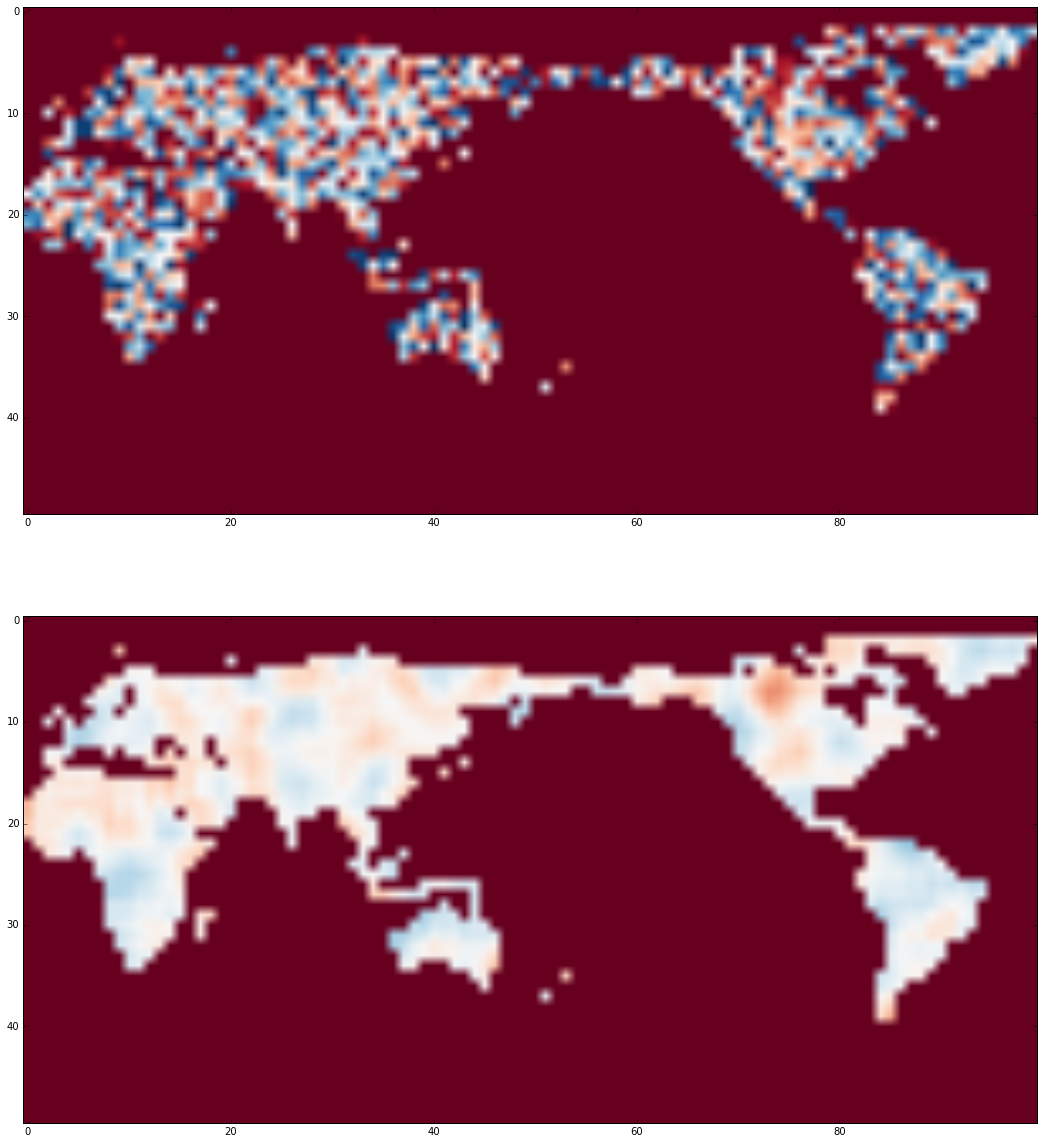

In [27]:
import scipy.signal
# make some kind of kernel, there are many ways to do this...
t = 1 - abs(linspace(-1, 1, 7))
kernel = t.reshape(7, 1) * t.reshape(1, 7)
kernel /= kernel.sum()   # kernel should sum to 1!  :) 

# convolve 2d the kernel with each channel
smooth = scipy.signal.convolve2d(w_map, kernel, mode='same')

smooth = smooth*mask 

fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(2,1,1)
pyplot.imshow(w_map*mask,cmap = cm.RdBu)
pyplot.clim(0,1)

pyplot.subplot(2,1,2)
pyplot.imshow(smooth,cmap = cm.RdBu)
pyplot.clim(0,1)

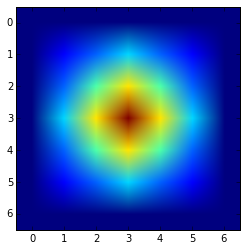

In [28]:
pyplot.imshow(kernel)

('error C:', 0.48370297030650949)
('error F:', 3.7997382402977171e-08)


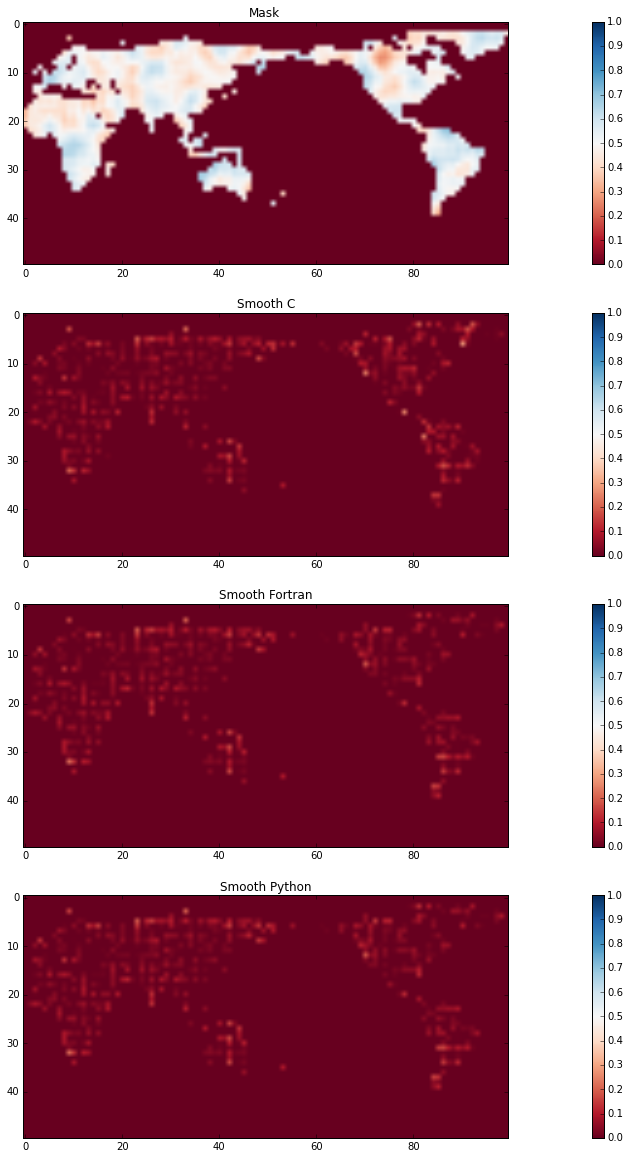

In [29]:
% matplotlib inline
from  matplotlib import pyplot 
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
#pyplot.subplot(211)
#im = pyplot.imshow(self.w_map, cmap = cm.RdBu)
#cb = pyplot.colorbar()
#cb.set_clim(0.0,1.0)

#pyplot.subplot(212)
#im = pyplot.imshow(self.w_map2, cmap = cm.RdBu)
#cb = pyplot.colorbar()
#cb.set_clim(0.0,1.0)

fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(411)
pyplot.title('Mask')
im = pyplot.imshow(smooth, cmap = cm.RdBu)
pyplot.clim(0,1)
cb = pyplot.colorbar()

pyplot.subplot(412)
pyplot.title('Smooth C')
im = pyplot.imshow(smooth-s_c, cmap = cm.RdBu)
pyplot.clim(0,1)
cb = pyplot.colorbar()

pyplot.subplot(413)
pyplot.title('Smooth Fortran')
im = pyplot.imshow(smooth-s_f, cmap = cm.RdBu)
pyplot.clim(0,1)
cb = pyplot.colorbar()

pyplot.subplot(414)
pyplot.title('Smooth Python')
im = pyplot.imshow(smooth-s_py, cmap = cm.RdBu)
pyplot.clim(0,1)
cb = pyplot.colorbar()

#cb.set_clim(0,1)
print('error C:',linalg.norm(s_c-s_py,2))
print('error F:',linalg.norm(s_f-s_py,2))

In [1]:
import Cmodules
import Fmodules
import Pymodules
#from toolsWaves import smooth7
from numpy import *

In [2]:
n = 100
k = 0.1
d = random.random(n)
b = random.random(n)
x = random.random(n)
dx = x[1]-x[0]
w_map = random.random((n/2,n))
u = random.random(n)*10
#u = ones(n)
h = 0.1
kap0 = d
kaph = b

In [3]:
Pymodules.Amult1(u,dx)
#Pymodules.amult(u)

array([  0.33254262,  -6.9109787 ,   6.90114224,   0.6433342 ,
        -8.74268641,   5.17541432,  -0.52903212,   1.03383611,
        -2.71258208,   4.52389416,  -3.79231769,   6.41881915,
        -9.53026523,   5.93245307,  -3.55172816,   6.31594183,
        -1.8743033 ,  -0.81137969,  -1.39155091,  -4.15363132,
         3.28757228,   8.06594317,  -7.97635133,  -1.33289439,
        -4.22273509,   9.29403721,   2.56153182, -10.63577981,
         9.168402  ,  -9.99440614,  12.58374786, -13.91360548,
        13.42042258, -10.76795429,   8.66704375,  -1.03619165,
        -4.75455299,   1.5628216 ,  -0.30477466,  -2.0350007 ,
         7.53796009,  -5.77265785,  -4.75473708,   9.97606693,
        -6.78118374,   4.49575649,  -6.85678087,   9.73069974,
        -5.64985368,   5.63407701,  -6.75599818,   2.11017163,
        -5.66761276,   7.19212147,   1.18907282,  -9.01425886,
         8.03140205,   2.44205382, -11.81422497,   6.61987369,
         5.77019979,  -8.3333851 ,   3.99479951,   0.52

In [4]:
#Cmodules.amult(u)
Cmodules.amult1(u,dx)

array([  0.33254262,  -6.9109787 ,   6.90114224,   0.6433342 ,
        -8.74268641,   5.17541432,  -0.52903212,   1.03383611,
        -2.71258208,   4.52389416,  -3.79231769,   6.41881915,
        -9.53026523,   5.93245307,  -3.55172816,   6.31594183,
        -1.8743033 ,  -0.81137969,  -1.39155091,  -4.15363132,
         3.28757228,   8.06594317,  -7.97635133,  -1.33289439,
        -4.22273509,   9.29403721,   2.56153182, -10.63577981,
         9.168402  ,  -9.99440614,  12.58374786, -13.91360548,
        13.42042258, -10.76795429,   8.66704375,  -1.03619165,
        -4.75455299,   1.5628216 ,  -0.30477466,  -2.0350007 ,
         7.53796009,  -5.77265785,  -4.75473708,   9.97606693,
        -6.78118374,   4.49575649,  -6.85678087,   9.73069974,
        -5.64985368,   5.63407701,  -6.75599818,   2.11017163,
        -5.66761276,   7.19212147,   1.18907282,  -9.01425886,
         8.03140205,   2.44205382, -11.81422497,   6.61987369,
         5.77019979,  -8.3333851 ,   3.99479951,   0.52

In [5]:
Fmodules.amult1(u,dx)
#Fmodules.amult(u)

array([  0.33254262,  -6.9109787 ,   6.90114224,   0.6433342 ,
        -8.74268641,   5.17541432,  -0.52903212,   1.03383611,
        -2.71258208,   4.52389416,  -3.79231769,   6.41881915,
        -9.53026523,   5.93245307,  -3.55172816,   6.31594183,
        -1.8743033 ,  -0.81137969,  -1.39155091,  -4.15363132,
         3.28757228,   8.06594317,  -7.97635133,  -1.33289439,
        -4.22273509,   9.29403721,   2.56153182, -10.63577981,
         9.168402  ,  -9.99440614,  12.58374786, -13.91360548,
        13.42042258, -10.76795429,   8.66704375,  -1.03619165,
        -4.75455299,   1.5628216 ,  -0.30477466,  -2.0350007 ,
         7.53796009,  -5.77265785,  -4.75473708,   9.97606693,
        -6.78118374,   4.49575649,  -6.85678087,   9.73069974,
        -5.64985368,   5.63407701,  -6.75599818,   2.11017163,
        -5.66761276,   7.19212147,   1.18907282,  -9.01425886,
         8.03140205,   2.44205382, -11.81422497,   6.61987369,
         5.77019979,  -8.3333851 ,   3.99479951,   0.52

In [6]:
Pymodules.trisolLeo1(k,dx,d,b)

array([  4.58630743e+00,   4.82233654e+00,   1.97323507e+00,
         5.79647091e+00,   8.22972906e-01,  -2.63680474e+00,
        -4.28341538e+01,  -1.63793033e+02,  -2.92670588e+02,
        -1.53745752e+01,   3.98024073e-02,   3.15055943e-01,
         3.60513033e+00,   2.12843140e+00,   5.48798470e+00,
         4.96048910e-01,   6.83188625e-01,   3.39538713e+00,
         2.30781831e+00,   1.61829146e+01,   2.41358566e+00,
         4.86591338e+00,   4.04775702e+00,   4.67630398e-01,
         2.29974744e+00,   8.99450631e-01,   2.85778484e+00,
         1.99090514e+00,   4.35132602e-01,   1.18704216e-01,
         1.34692457e-01,   1.13189735e+00,   7.11836197e+00,
         6.58817692e-01,   6.46040910e-01,   1.22165197e+00,
         9.72876045e-01,   2.25455790e+00,   3.05551127e+00,
         9.70731902e-01,   2.20758925e+00,   3.13503419e+00,
         6.34571366e+00,   6.02400603e+00,   7.88683774e+00,
         1.37644182e+00,   8.34383087e-01,   1.38024941e+00,
         2.36086553e+00,

In [7]:
Fmodules.trisolleo1(k,dx,d,b)
#Fmodules.trisol1(k,d,b)

array([  4.58630743e+00,   4.82233654e+00,   1.97323507e+00,
         5.79647091e+00,   8.22972906e-01,  -2.63680474e+00,
        -4.28341538e+01,  -1.63793033e+02,  -2.92670588e+02,
        -1.53745752e+01,   3.98024073e-02,   3.15055943e-01,
         3.60513033e+00,   2.12843140e+00,   5.48798470e+00,
         4.96048910e-01,   6.83188625e-01,   3.39538713e+00,
         2.30781831e+00,   1.61829146e+01,   2.41358566e+00,
         4.86591338e+00,   4.04775702e+00,   4.67630398e-01,
         2.29974744e+00,   8.99450631e-01,   2.85778484e+00,
         1.99090514e+00,   4.35132602e-01,   1.18704216e-01,
         1.34692457e-01,   1.13189735e+00,   7.11836197e+00,
         6.58817692e-01,   6.46040910e-01,   1.22165197e+00,
         9.72876045e-01,   2.25455790e+00,   3.05551127e+00,
         9.70731902e-01,   2.20758925e+00,   3.13503419e+00,
         6.34571366e+00,   6.02400603e+00,   7.88683774e+00,
         1.37644182e+00,   8.34383087e-01,   1.38024941e+00,
         2.36086553e+00,

In [8]:
Cmodules.trisolleo1(k,dx,d,b)
#Cmodules.trisol1(k,d,b)

array([  4.58630743e+00,   4.82233654e+00,   1.97323507e+00,
         5.79647091e+00,   8.22972906e-01,  -2.63680474e+00,
        -4.28341538e+01,  -1.63793033e+02,  -2.92670588e+02,
        -1.53745752e+01,   3.98024073e-02,   3.15055943e-01,
         3.60513033e+00,   2.12843140e+00,   5.48798470e+00,
         4.96048910e-01,   6.83188625e-01,   3.39538713e+00,
         2.30781831e+00,   1.61829146e+01,   2.41358566e+00,
         4.86591338e+00,   4.04775702e+00,   4.67630398e-01,
         2.29974744e+00,   8.99450631e-01,   2.85778484e+00,
         1.99090514e+00,   4.35132602e-01,   1.18704216e-01,
         1.34692457e-01,   1.13189735e+00,   7.11836197e+00,
         6.58817692e-01,   6.46040910e-01,   1.22165197e+00,
         9.72876045e-01,   2.25455790e+00,   3.05551127e+00,
         9.70731902e-01,   2.20758925e+00,   3.13503419e+00,
         6.34571366e+00,   6.02400603e+00,   7.88683774e+00,
         1.37644182e+00,   8.34383087e-01,   1.38024941e+00,
         2.36086553e+00,

In [9]:
Fmodules.trisol0(k,d)

array([ 0.13087447,  0.23877609,  0.73368153,  0.13241026,  0.69847883,
        0.67015136,  0.19823549,  0.09888846,  0.05046347,  0.90122102,
        0.8691529 ,  0.90368819,  0.19215092,  0.42271943,  0.21666946,
        0.97058563,  0.81950424,  0.33441013,  0.74174755,  0.10023942,
        0.5562247 ,  0.19856532,  0.17758078,  0.85282052,  0.24622129,
        0.79308021,  0.37975944,  0.40183549,  0.68284414,  0.3460903 ,
        0.47022704,  0.44377211,  0.17550882,  0.90768559,  0.94584618,
        0.5330803 ,  0.26523467,  0.46730196,  0.36216588,  0.66157101,
        0.49635882,  0.25793168,  0.18115901,  0.1986608 ,  0.13032387,
        0.83041222,  0.43895612,  0.53039429,  0.18782374,  0.64251469,
        0.83965457,  0.84686082,  0.23203704,  0.36240221,  0.5588734 ,
        0.20883073,  0.32027343,  0.5649733 ,  0.44804559,  0.65423287,
        0.59886945,  0.33071391,  0.18434261,  0.68225335,  0.19429135,
        0.49103428,  0.27256141,  0.30697457,  0.31072938,  0.19

In [10]:
Cmodules.trisol0(k,d)

array([ 0.13087447,  0.23877609,  0.73368153,  0.13241026,  0.69847883,
        0.67015136,  0.19823549,  0.09888846,  0.05046347,  0.90122102,
        0.8691529 ,  0.90368819,  0.19215092,  0.42271943,  0.21666946,
        0.97058563,  0.81950424,  0.33441013,  0.74174755,  0.10023942,
        0.5562247 ,  0.19856532,  0.17758078,  0.85282052,  0.24622129,
        0.79308021,  0.37975944,  0.40183549,  0.68284414,  0.3460903 ,
        0.47022704,  0.44377211,  0.17550882,  0.90768559,  0.94584618,
        0.5330803 ,  0.26523467,  0.46730196,  0.36216588,  0.66157101,
        0.49635882,  0.25793168,  0.18115901,  0.1986608 ,  0.13032387,
        0.83041222,  0.43895612,  0.53039429,  0.18782374,  0.64251469,
        0.83965457,  0.84686082,  0.23203704,  0.36240221,  0.5588734 ,
        0.20883073,  0.32027343,  0.5649733 ,  0.44804559,  0.65423287,
        0.59886945,  0.33071391,  0.18434261,  0.68225335,  0.19429135,
        0.49103428,  0.27256141,  0.30697457,  0.31072938,  0.19

In [11]:
Pymodules.trisol0(k,d)

array([ 0.13087447,  0.23877609,  0.73368153,  0.13241026,  0.69847883,
        0.67015136,  0.19823549,  0.09888846,  0.05046347,  0.90122102,
        0.8691529 ,  0.90368819,  0.19215092,  0.42271943,  0.21666946,
        0.97058563,  0.81950424,  0.33441013,  0.74174755,  0.10023942,
        0.5562247 ,  0.19856532,  0.17758078,  0.85282052,  0.24622129,
        0.79308021,  0.37975944,  0.40183549,  0.68284414,  0.3460903 ,
        0.47022704,  0.44377211,  0.17550882,  0.90768559,  0.94584618,
        0.5330803 ,  0.26523467,  0.46730196,  0.36216588,  0.66157101,
        0.49635882,  0.25793168,  0.18115901,  0.1986608 ,  0.13032387,
        0.83041222,  0.43895612,  0.53039429,  0.18782374,  0.64251469,
        0.83965457,  0.84686082,  0.23203704,  0.36240221,  0.5588734 ,
        0.20883073,  0.32027343,  0.5649733 ,  0.44804559,  0.65423287,
        0.59886945,  0.33071391,  0.18434261,  0.68225335,  0.19429135,
        0.49103428,  0.27256141,  0.30697457,  0.31072938,  0.19

In [12]:
Pymodules.godunovstepNeumannLeo1(h, k,dx, u)
#Pymodules.godunovstep1(h, k, u)

array([ 4.42841686,  4.42841686,  3.07013127,  4.14752343,  5.02536449,
        3.44655092,  3.13556906,  2.81243043,  2.82711038,  1.63066214,
        2.66180437,  2.12834317,  3.95697083,  2.14137567,  2.44479386,
        1.28326073,  3.42254257,  4.40107631,  4.84903203,  4.70149799,
        3.14306684,  2.77986997,  5.14647527,  5.10790758,  4.17974172,
        1.00001678,  2.70726847,  4.61232375,  3.13062905,  4.17142104,
        1.90608412,  4.14768542,  1.25195687,  3.75215625,  2.05678713,
        3.84286743,  4.83914472,  4.40028696,  4.21551852,  3.89084961,
        2.95613171,  4.62488963,  4.3314678 ,  2.02937589,  3.73072233,
        3.0019173 ,  3.55096822,  1.39029017,  3.68412966,  3.82922448,
        5.22042784,  4.93271565,  4.75214907,  2.85038696,  3.5543219 ,
        4.3888694 ,  2.08158381,  3.06427285,  4.40365271,  1.2563176 ,
        0.55764106,  3.25317659,  1.91776901,  2.22870817,  2.93745993,
        3.37964495,  3.32721684,  4.46568285,  3.29006242,  3.31

In [13]:
Cmodules.godunovstepneumann2nd(h, k, dx, u)
#Cmodules.godunovstep1(h, k, u)

array([ 4.42841686,  4.42841686,  3.07013127,  4.14752343,  5.02536449,
        3.44655092,  3.13556906,  2.81243043,  2.82711038,  1.63066214,
        2.66180437,  2.12834317,  3.95697083,  2.14137567,  2.44479386,
        1.28326073,  3.42254257,  4.40107631,  4.84903203,  4.70149799,
        3.14306684,  2.77986997,  5.14647527,  5.10790758,  4.17974172,
        1.00001678,  2.70726847,  4.61232375,  3.13062905,  4.17142104,
        1.90608412,  4.14768542,  1.25195687,  3.75215625,  2.05678713,
        3.84286743,  4.83914472,  4.40028696,  4.21551852,  3.89084961,
        2.95613171,  4.62488963,  4.3314678 ,  2.02937589,  3.73072233,
        3.0019173 ,  3.55096822,  1.39029017,  3.68412966,  3.82922448,
        5.22042784,  4.93271565,  4.75214907,  2.85038696,  3.5543219 ,
        4.3888694 ,  2.08158381,  3.06427285,  4.40365271,  1.2563176 ,
        0.55764106,  3.25317659,  1.91776901,  2.22870817,  2.93745993,
        3.37964495,  3.32721684,  4.46568285,  3.29006242,  3.31

In [14]:
Fmodules.godunovstepneumann2nd(h, k,dx, u)

array([ 4.42841686,  4.42841686,  3.07013127,  4.14752343,  5.02536449,
        3.44655092,  3.13556906,  2.81243043,  2.82711038,  1.63066214,
        2.66180437,  2.12834317,  3.95697083,  2.14137567,  2.44479386,
        1.28326073,  3.42254257,  4.40107631,  4.84903203,  4.70149799,
        3.14306684,  2.77986997,  5.14647527,  5.10790758,  4.17974172,
        1.00001678,  2.70726847,  4.61232375,  3.13062905,  4.17142104,
        1.90608412,  4.14768542,  1.25195687,  3.75215625,  2.05678713,
        3.84286743,  4.83914472,  4.40028696,  4.21551852,  3.89084961,
        2.95613171,  4.62488963,  4.3314678 ,  2.02937589,  3.73072233,
        3.0019173 ,  3.55096822,  1.39029017,  3.68412966,  3.82922448,
        5.22042784,  4.93271565,  4.75214907,  2.85038696,  3.5543219 ,
        4.3888694 ,  2.08158381,  3.06427285,  4.40365271,  1.2563176 ,
        0.55764106,  3.25317659,  1.91776901,  2.22870817,  2.93745993,
        3.37964495,  3.32721684,  4.46568285,  3.29006242,  3.31

In [17]:
Cmodules.godunovstep2(h,k,u,d,b)

array([ 3.73037894,  1.622391  ,  0.35457489, -4.70040699,  2.60519849,
        2.04491   ,  2.24299424,  1.4221233 ,  0.3211761 ,  3.30071478])

In [18]:
Fmodules.godunovstep2(h,k,u,d,b)

array([ 3.73037894,  1.622391  ,  0.35457489, -4.70040699,  2.60519849,
        2.04491   ,  2.24299424,  1.4221233 ,  0.3211761 ,  3.30071478])

In [19]:
Pymodules.godunovstep2(h,k,u,d,b)

array([ 3.73037894,  1.622391  ,  0.35457489, -4.70040699,  2.60519849,
        2.04491   ,  2.24299424,  1.4221233 ,  0.3211761 ,  3.30071478])

In [66]:
#GodunovStep1
k= k/4

#ut = Amult(n,u)
ut = Pymodules.amult(u)

rhs = u[0:n]+ k*ut
#solve using tridiag solver 
#v = trisol0(n,kcfl,rhs,s1,s2)
v = Pymodules.trisol0(k, rhs)

In [67]:
print ut
print rhs

[  0.          -6.26748266   8.93507929 -10.78036568  13.68471671
  -6.18207055  -1.78682953  -4.7658756    5.41083928   0.        ]
[ 7.78804875  9.01558838  4.51239647  8.07133368  1.95441839  8.41392307
  9.29790791  8.21070604  2.6865226   2.18348958]


In [68]:
#GodunovStep2
ut = Pymodules.amult(u)
ut = k*ut
#try:
#right hand side part for part of Euler uses K(t)
uC = u[0:n]/kap0[0:n]
#except ZeroErrorDivision:
#    print 'godunovstep2 divides by Zero kap0[0:n]', kap0[0:n]

#try:
#left hand side version uses K(t+h)
uh = u[0:n]/kaph[0:n]
#except ZeroErrorDivision:
#print 'godunov2 divides by Zero kaph[0:n]', kap0[0:n]


#common part of Euler estimate 
uE = ut + h*(1-uC)*u[0:n]
#Compute right hand side 
ur = u[0:n]+0.5*uE #RHS
uE = u[0:n]+uE

#dA = zeros(n)
dA = empty(n)
dA[0] = 1 
dA[n-1] = 1 #end points
# interior diags. of LHS matrix:
dA[1:n-1] = 1 + k - 0.5*h*(1-uh[1:n-1])

#solve using tridiag solver 
#v = trisol1(n,k,dA,ur,s1,s2)
v = Pymodules.trisol1(k,dA,ur)

In [69]:
print ut
print uE
print ur
print dA

[ 0.         -0.15668707  0.22337698 -0.26950914  0.34211792 -0.15455176
 -0.04467074 -0.11914689  0.13527098  0.        ]
[ -5.71993669  -2.13911043 -10.76435474 -10.32167329   1.77891031
  -3.37941445  -6.29479803  -6.54420712   1.99433311   1.73282224]
[ 1.03405603  3.51658251 -3.23766762 -0.99041523  1.69560539  2.59453019
  1.52389031  0.8928229   2.27279236  1.95815591]
[ 1.          1.90257472  2.00762454  1.53172182  1.06545293  1.88205005
  2.61355047  1.48843005  5.9364295   1.        ]


In [70]:
#first compute Euler estimate
#ut = (Amult(n,u))'
#ut = k*ut
#uE = ut + h*(1-u).*u # commmon part of Euler est.
ut = Pymodules.amult(u)
uE = k*ut+ h*(1-u)*u
# compute right hand side
#ur = u + 0.5*uE #RHS
#uE = u + uE #Euler est.
#dA(1) = 1; dA(n) = 1 #end points
ur = u + 0.5*uE #RHS
uE = u + uE #Euler estimate
dA = zeros(n)
dA[0] = 1; dA[n-1] = 1 #end points

# interior diags. of LHS matrix:
#dA(2:n-1) = 1 + k - 0.5*h*(1-uE(2:n-1));
dA[1:n-1] = 1 + k - 0.5*h*(1-uE[1:n-1]) #here we have a bug!!!!! 1:n-2 goes from the second untile one before the last 

# solve using Forsythe-Moler
#v  = trisol(n,k,dA,ur,s1,s2);
#v = trisol(n,k,dA,ur,s1,s2)
#v = modules.trisol(k,dA,ur)
v = Cmodules.trisol(k,dA,ur)

In [71]:
print ut
print uE
print ur
print dA

[  0.          -6.26748266   8.93507929 -10.78036568  13.68471671
  -6.18207055  -1.78682953  -4.7658756    5.41083928   0.        ]
[ 2.50148329  1.51975223  3.1017296   1.94845206  1.85569716  1.92889445
  1.5037882   2.10504635  2.29075928  1.92507586]
[ 5.14476602  5.34601384  3.69537455  5.14464744  1.73399882  5.24868465
  5.42318342  5.21744964  2.42100545  2.05428272]
[ 1.          1.05098761  1.13008648  1.0724226   1.06778486  1.07144472
  1.05018941  1.08025232  1.08953796  1.        ]


In [72]:
from numpy import *
def trisol(n,k,d,b):
    # constant: mk2 (minus k divided by 2)
    #   mk2   = -k/2;
    #   s2(1) = 1;
    #   s2(2) = d(2);
    #   s1(2) = mk2;
    s1 = zeros(n);
    s2 = zeros(n);
    x = zeros (n);
    mk2 = -k/2
    s2[0] = 1
    s2[1] = d[1]
    s1[1] = mk2

    # Leo: Forward elimination
    #for i=3:n-1
    #  s1(i) = mk2/s2(i-1);
    #  s2(i) = d(i) - mk2*s1(i);
    #end
    for i in arange(2,n-1):
        s1[i] = mk2/s2[i-1];
        s2[i] = d[i] - mk2*s1[i]
        
    #s1(n) = 0; s2(n) = 1;
    s1[n-1] = 0; s2[n-1] = 1;
    
    #x(1) = b(1);
    #for i=2:n
    #    x(i) = b(i) - s1(i)*x(i-1);
    #end
    x[0]=b[0]
    for i in arange(1,n):
        x[i] = b[i] - s1[i]*x[i-1]

    # Leo: backward substitution 
    #x(n) = x(n)/s2(n); ii = n-1;
    #for i=1:n-2
    #   x(ii) = (x(ii) - mk2*x(ii+1))/s2(ii);
    #   ii    = ii - 1;
    #end
    x[n-1] = x[n-1]/s2[n-1]; ii = n-2;
    for i in arange(0,n-2):
        x[ii] = (x[ii]-mk2*x[ii+1])/s2[ii];
        ii = ii - 1;
        
    #x(1) = x(1)/s2(1);
    x[0] = x[0]/s2[0];
    return x;

In [73]:
trisol(n,k,d,b)

array([ 0.21576155,  0.7507378 ,  2.08626319,  2.18396578,  1.20367098,
        0.852751  ,  0.60357582,  1.84161084,  0.08123991,  0.56703786])

In [74]:
def Amult(n,u):
    # it performs tridiagonal matrix multiply, returns n elements of v
    # with v(1) = v(n) = 0, the others are u(i-1)+u(i+1)-2*u(i)
    #   v(1) = 0; v(n) = 0;
    #   v(2:n-1) = u(1:n-2)+u(3:n)-2*u(2:n-1);
    v = zeros(n);
    v[0] = 0; v[-1] = 0;
    v[1:-2] = u[0:-3]+u[2:-1]-2*u[1:-2]
    return v

In [75]:
def godunovstep(n,h,k,u,s1,s2):
    # first compute Euler estimate
    #ut = (Amult(n,u))'
    #ut = k*ut
    #uE = ut + h*(1-u).*u # commmon part of Euler est.
    ut = Amult(n,u)
    ut = k*ut
    uE = ut + h*(1-u)*u
    
    # compute right hand side
    #ur = u + 0.5*uE #RHS
    #uE = u + uE #Euler est.
    #dA(1) = 1; dA(n) = 1 #end points
    ur = u + 0.5*uE #RHS
    uE = u + uE #Euler estimate
    dA = zeros(n)
    dA[0] = 1; dA[n-1] = 1 #end points

    # interior diags. of LHS matrix:
    #dA(2:n-1) = 1 + k - 0.5*h*(1-uE(2:n-1));
    dA[1:n-2] = 1 + k - 0.5*h*(1-uE[1:n-2])

    # solve using Forsythe-Moler
    #v  = trisol(n,k,dA,ur,s1,s2);
    #v = trisol(n,k,dA,ur,s1,s2)
    #v = modules.trisol(k,dA,ur)
    v = Cmodules.trisol(k,dA,ur)
    return v

## Initializing Simulation

In [1]:
% matplotlib inline
from TravelingWaves2D_0 import Simulation
from TravelingWaves2D_0 import *
#sim = Simulation('testSmall')
#sim = Simulation('testBig')
sim = Simulation('small')
#sim = Simulation('big')

 MAP SIZE: NX=Grid_size_x=100, NY=Grid_size_y=50 
 INPUT Parameter summary: 
   Number of time steps: NT=2001 
   Plotting interval: NPLT=40 
   Diffusion coeff: Kyb = 2.080000e+02 (in km^2/yr)
   Growth rate: Ryb = 1.670000e-03 (in yr^{-1})
   CELL size: dx=dy = 404.8 (km)=   0.8 (eq. (3) units)
   BOX: X x Y = [-40.1,  40.1] x [-20.1,  20.1]
   eq. (3) step size h=4.089455e-02, and CFL number=3.108425e-02 



## Single Iteration Small

In [2]:
nxsegs, xstart_seg, xend_seg = Xscan(sim.w_map)
nysegs, ystart_seg, yend_seg = Yscan(sim.w_map)
u = sim.u
h = sim.h
kcfl = sim.kcfl
NS = max(sim.NY,sim.NX)
sc1 = zeros(NS)
sc2 = zeros(NS)
kap0 = zeros(NS)
kaph = zeros(NS)
Ts = sim.Ts
Te = sim.Te
tsc = sim.tsc
yp = yppoints() #Interpolation points  

# read the CC map lists and times=tepoch's for each frame: find first
# Search for appropriate NPP maps:
#      from start time Ts (in kya) to end time Te
#loading carrying capacities from namelist
yalist, tepoch = get_cc_list()

kstart = 1;  
while tepoch[kstart+1] >= Ts:
    kstart=kstart+1

print '   Start time Ts=%5.1f (kya), NPP frame kstart=%d\n'%(Ts,kstart); 

kend = 61
while tepoch[kend-1] <= Te: 
    kend=kend-1

print '   End time   Te=%5.1f (kya), NPP frame kend=%d\n'%(Te,kend); 

# make sure there are at least 2 maps between Ts and Te
if ((kend-kstart)<1) or ((tepoch[kstart]-tepoch[kend])<(Ts-Te)):
   print 'Ts=%e, Te=%e, not space enough: kstart=%d, kend=%d\n'%(Ts,Te,kstart,kend)

#      start and end maps found
kmp = kstart                     # start counting maps here



#Using Jed's map
if sim.mapsize =='big':
    import netCDF4
    data = netCDF4.Dataset('/Users/Leo/Desktop/Maps_Leo/fep_test.nc','r')
    w_J = flipud(data.variables['FEP'][:].data)
    w_J = roll(w_J,-310,axis=1)
    w_J[w_J<0]=0
    w_L = w_J.copy()
    w_H= w_J.copy()

else: 
    w_L = kapepoch(sim.w_map,yalist,kmp) # this is the first map
    t_L = tepoch[kmp]
    kmp = kmp + 1                  # increment map count
    w_H = kapepoch(sim.w_map,yalist,kmp) # second map
    t_H = tepoch[kmp]

    
s   = (t_L-Ts+tsc*h)/(t_L-t_H)  # first step interpolation parameter
wt0 = 0.0;
# compute interpoated weight to get to step t=h
ks  = floor(100*s)
sd  = 100*s - ks               # residual sd = 100*s mod 1
wth = yp[0]*(1-sd) + yp[1]*sd  # first interpolant
t   = Ts                       # this is real time in kya

# TGL alternates between 1 and 0 
TGL = True
NT = 1
it = 0

   Start time Ts= 50.0 (kya), NPP frame kstart=25

   End time   Te=  1.0 (kya), NPP frame kend=60



In [14]:
import Fmodules as modules
#for it in xrange(0,NT):
#%debug 0
print 'iteration=',it 
if TGL: #First choice: half-step1 in Y, and step 2 in X 
    locy = 0
    #half-step1 in Y
    for j in xrange(0,sim.NX):
        nsegs = nysegs[j] #Number of segments 
        for k in xrange(0,nsegs):
            istart=ystart_seg[locy+k] #From: segment starts
            iend=yend_seg[locy+k] #To:segmend ends
            ninseg=iend-istart+1
            u0 = zeros(ninseg+2)
            u0[0] = 0
            u0[ninseg+1] = 0
            u0[1:ninseg+1] = u[istart:iend+1,j]
            #print 'size:%d'%u0.size # 3,6,8,10,10,10,13,13,13
            #print ninseg+2
            #ut = godunovstep1(ninseg+2,h,kcfl,u0,sc1,sc2)
            ut = modules.godunovstep1(h,kcfl,u0[0:ninseg+2])
            u[istart:iend+1,j] = ut[1:ninseg+1]
            #print 'ut0=',ut

        locy = locy + nsegs

    #Step 2 : X direction updates
    locx = 0
    for i in xrange(0,sim.NY):
        nsegs = nxsegs[i]
        for k in xrange(0,nsegs):
            jstart=xstart_seg[locx+k]
            jend=xend_seg[locx+k]
            ninseg=jend-jstart+1
            u1 = zeros(ninseg+2)
            u1[0] = 0 
            u1[ninseg+1] = 0
            u1[1:ninseg+1] = u[i,jstart:jend+1]
            kap0[0] = 1 
            kap0[ninseg+1] = 1
            kap0[1:ninseg+1] = w_L[i,jstart:jend+1]*(1-wt0) + w_H[i,jstart:jend+1]*wt0

            #No interpolation
            #kap0[1:ninseg+1] = w_L[i,jstart:jend+1]

            kaph[0] = 1
            kaph[ninseg+1] = 1
            kaph[1:ninseg+1] = w_L[i,jstart:jend+1]*(1-wth) + w_H[i,jstart:jend+1]*wth
            
            #No interpolation
            #kaph[1:ninseg+1] = w_L[i,jstart:jend+1]

            #print ninseg+2
            #ut = godunovstep2(ninseg+2,h,kcfl,u1,sc1,sc2,kap0,kaph)
            ut = modules.godunovstep2(h,kcfl,u1[0:ninseg+2],kap0[0:ninseg+2],kaph[0:ninseg+2])

            u[i,jstart:jend+1] = ut[1:ninseg+1]

            #print jstart, jend, ninseg
            #print kap0[1:ninseg+1]
            #print kaph[1:ninseg+1]
            #print ut 
            #print ut[1:ninseg+1]
            #print 'ut1=',ut



        locx = locx + nsegs

    # half step1 in Y direction
    locy = 0
    for j in xrange(0,sim.NX):
        nsegs = nysegs[j]
        for k in xrange(0,nsegs):
            istart=ystart_seg[locy+k]
            iend=yend_seg[locy+k]
            ninseg=iend-istart+1
            u0 = zeros(ninseg+2)
            u0[0] = 0
            u0[ninseg+1] = 0
            u0[1:ninseg+1] = u[istart:iend+1,j]
            #ut = godunovstep1(ninseg+2,h,kcfl,u0,sc1,sc2)
            ut = modules.godunovstep1(h,kcfl,u0[0:ninseg+2])                        
            u[istart:iend+1,j] = ut[1:ninseg+1]
            #print 'ut2=',ut



        locy = locy + nsegs

    TGL = False
else:
    #half-step1 in X-Direction
    locx = 0
    #half-step1 in Y
    for i in xrange(0,sim.NY):
        nsegs = nxsegs[i] #Number of segments 
        for k in xrange(0,nsegs):
            jstart=xstart_seg[locx+k] #From: segment starts
            jend=xend_seg[locx+k] #To:segmend ends
            ninseg=jend-jstart+1
            u1 = zeros(ninseg+2)
            u1[0] = 0 
            u1[ninseg+1] = 0
            u1[1:ninseg+1] = u[i,jstart:jend+1]
            #print 'size:%d'%u0.size # 3,6,8,10,10,10,13,13,13
            #print ninseg+2
            #ut = godunovstep1(ninseg+2,h,kcfl,u1,sc1,sc2)
            ut = modules.godunovstep1(h,kcfl,u1[0:ninseg+2])
            u[i,jstart:jend+1] = ut[1:ninseg+1]

        locx = locx + nsegs
    #step2 in Y-Direction 
    locy = 0
    for j in xrange(0,sim.NX):
        nsegs = nysegs[j]
        for k in xrange(0,nsegs):
            #%debug 0
            istart=ystart_seg[locy+k]
            iend=yend_seg[locy+k]
            ninseg=iend-istart+1
            u0 = zeros(ninseg+2)
            u0[0] = 0 
            u0[ninseg+1] = 0
            u0[1:ninseg+1] = u[istart:iend+1,j]
            kap0[0] = 1 
            kap0[ninseg+1] = 1
            kap0[1:ninseg+1] = w_L[istart:iend+1,j]*(1-wt0) + w_H[istart:iend+1,j]*wt0
            #kap0[1:ninseg+1] = w_L[istart:iend+1,j]*(1-wt0) + w_H[istart:iend+1,j]*wt0
            kaph[0] = 1 
            kaph[ninseg+1] = 1
            #kaph[1:ninseg+1] = w_L[istart:iend+1,j]*(1-wth) + w_H[istart:iend+1,j]*wth
            #print ninseg+2
            #ut = godunovstep2(ninseg+2,h,kcfl,u0,sc1,sc2,kap0,kaph)
            ut = modules.godunovstep2(h,kcfl,u0[0:ninseg+2],kap0[0:ninseg+2],kaph[0:ninseg+2])

            u[istart:iend+1,j] = ut[1:ninseg+1]

        locy = locy + nsegs
    #half-step1 in X-Direction
    locx = 0
    for i in xrange(0,sim.NY):
        nsegs = nxsegs[i]
        for k in xrange(0,nsegs):
            jstart=xstart_seg[locx+k]
            jend=xend_seg[locx+k]
            ninseg=jend-jstart+1
            u1 = zeros(ninseg+2)
            u1[0] = 0
            u1[ninseg+1] = 0
            u1[1:ninseg+1] = u[i,jstart:jend+1]
            #ut = godunovstep1(ninseg+2,h,kcfl,u1,sc1,sc2)
            ut = modules.godunovstep1(h,kcfl,u1[0:ninseg+2])
            
            u[i,jstart:jend+1] = ut[1:ninseg+1]

        locx = locx + nsegs
    TGL = True
if kmp > kend: 
    print 'break hit, leaving loop'

# increment t value, reset weights and maps if necessary
t = t - tsc*h          # decrement t in kya
# # fprintf(' ordinary step: t_L=%e, t=%e, t_H=%e\n',t_L,t,t_H);
# if t > t_H:              # usual case, maps not exhausted
#     wt0 = wth           # shift lower weight down
#     s   = (t_L-t)/(t_L-t_H)  # interpolation parameter 
#                             # s = 0: t == t_L
#                             # s = 1: t == t_H
#     ks  = floor(100*s)   # Index from 0 to 100 
#     sd  = 100*s - ks    # residual sd = 100*s mod 1
#     wth = yp[ks]*(1-sd) + yp[ks]*sd  # first interpolant
# else:                   # reached upper map time 
#     kmp = kmp +1                      # increment map count
#     if kmp <= kend:               # kend is the last map
#         w_L = w_H                 # set lower map to prev. upper
#         t_L = t_H                 # set lower time to prev. upper
#         w_H = kapepoch(w_map,yalist,kmp)  # read next map
#         t_H = tepoch[kmp]         # time frame of new map
#         wt0 = 0
#         s   = (t_L - t)/(t_L-t_H)  # interpolation parameter
#         ks  = floor(100*s)
#         sd  = 100*s - ks                    # mod1 interpolation 
#         wth = yp[ks]*(1-sd) + yp[ks+1]*sd  # first interpolant

#Storing data 
#if (mod(it,sim.NPLT)==0)or(it==sim.NT):
#    if t < 10:
#        tstr = '%4.2f'%t
#    else:
#        tstr = '%4.1f'%t

it = it +1 

iteration= 8


In [12]:
from  matplotlib import pyplot 
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
#pyplot.subplot(211)
#im = pyplot.imshow(self.w_map, cmap = cm.RdBu)
#cb = pyplot.colorbar()
#cb.set_clim(0.0,1.0)

#pyplot.subplot(212)
#im = pyplot.imshow(self.w_map2, cmap = cm.RdBu)
#cb = pyplot.colorbar()
#cb.set_clim(0.0,1.0)

u_plot = sim.w_map-1+log(1+10*u)
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(111)
pyplot.title('Title')
im = pyplot.imshow(u, cmap = cm.RdBu)
pyplot.clim(0,1)
cb = pyplot.colorbar()
#cb.set_clim(0,1)

In [44]:
import os
filename = []
epoch=[]
for file in os.listdir("/Users/Leo/Desktop/MasterThesis/PopulationDynamics/Code/WesleyCode/mapsimleo/"):
    if file.endswith(".asc"):
        #appending namefile 
        filename.append(file)
        broken=file.split('_')
        #appending epoch 
        epoch.append(int(broken[2][0:3]))    

filenames, epoch=zip(*sorted(zip(filename, epoch), key = lambda x: x[1], reverse=True ))

In [45]:
print epoch

(120, 116, 112, 108, 104, 100, 96, 92, 88, 84, 80, 78, 76, 74, 72, 70, 68, 66, 64, 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)


In [46]:
zip(*sorted(zip(yalist, tepoch), key = lambda x: x[1], reverse=True ))

[('cc_100x150_120k.asc',
  'cc_100x150_116k.asc',
  'cc_100x150_112k.asc',
  'cc_100x150_108k.asc',
  'cc_100x150_104k.asc',
  'cc_100x150_100k.asc',
  'cc_100x150_096k.asc',
  'cc_100x150_092k.asc',
  'cc_100x150_088k.asc',
  'cc_100x150_084k.asc',
  'cc_100x150_080k.asc',
  'cc_100x150_078k.asc',
  'cc_100x150_076k.asc',
  'cc_100x150_074k.asc',
  'cc_100x150_072k.asc',
  'cc_100x150_070k.asc',
  'cc_100x150_068k.asc',
  'cc_100x150_066k.asc',
  'cc_100x150_064k.asc',
  'cc_100x150_062k.asc',
  'cc_100x150_060k.asc',
  'cc_100x150_058k.asc',
  'cc_100x150_056k.asc',
  'cc_100x150_054k.asc',
  'cc_100x150_052k.asc',
  'cc_100x150_050k.asc',
  'cc_100x150_048k.asc',
  'cc_100x150_046k.asc',
  'cc_100x150_044k.asc',
  'cc_100x150_042k.asc',
  'cc_100x150_040k.asc',
  'cc_100x150_038k.asc',
  'cc_100x150_036k.asc',
  'cc_100x150_034k.asc',
  'cc_100x150_032k.asc',
  'cc_100x150_030k.asc',
  'cc_100x150_028k.asc',
  'cc_100x150_026k.asc',
  'cc_100x150_024k.asc',
  'cc_100x150_022k.asc',


## Single Iteration Large 

In [1]:
% matplotlib inline
from strategyTravelingWaves import Simulation
from strategyTravelingWaves import *
#sim = Simulation('testSmall')
#sim = Simulation('testBig')
sim = LargeSimulation()

=====Initializing large simulation=====
 INPUT Parameter summary: 
   Number of time steps: NT=134 
   Plotting interval: NPLT=40 
   Diffusion coeff: Kyb = 2.080000e+02 (in km^2/yr)
   Growth rate: Ryb = 1.670000e-03 (in yr^{-1})
 MAP SIZE: NX=720 (E-W), NY=360 (N-S)
   CELL size: dx=dy = 111.6 (km)=   0.2 (eq. (3) units)
   eq. (3) step size h=5.000000e-02, and CFL number=4.997623e-01 



In [2]:
print "=====Large Simulation Starting====="
output = False
module = 'C'

#Deciding which booster to use 
if module == 'Fortran':
    import Fmodules as modules

elif module =='C':
    import Cmodules as modules

elif module =='Python':
    import Pymodules as modules 

Ts = sim.data.Ts
Te = sim.data.Te
tsc = sim.data.tsc
h = sim.data.h
kcfl = sim.data.kcfl
u = sim.data.u      

NS = max(sim.data.NY,sim.data.NX) #find max size 
u0 = zeros(NS)         
u1 = zeros(NS) 
kap0 = zeros(NS)
kaph = zeros(NS)

yp = yppoints() #Interpolation points   

# read the CC map lists and times=tepoch's for each frame: find first
# Search for appropriate NPP maps:
#      from start time Ts (in kya) to end time Te
#loading carrying capacities from namelist
yalist, masks, tepoch = get_cc_list(sim.data.mapsize)

#kstart = 1  
kstart = 0
while tepoch[kstart+1] >= Ts:
    kstart=kstart+1

print '   Start time Ts=%5.1f (kya), NPP frame kstart=%d\n'%(Ts,kstart) 

kend = 61 #Leo: Verify this, it's probably 60
while tepoch[kend-1] <= Te: 
    kend=kend-1

print '   End time   Te=%5.1f (kya), NPP frame kend=%d\n'%(Te,kend)

# make sure there are at least 2 maps between Ts and Te
if ((kend-kstart)<1) or ((tepoch[kstart]-tepoch[kend])<(Ts-Te)):
   print 'Ts=%e, Te=%e, not space enough: kstart=%d, kend=%d\n'%(Ts,Te,kstart,kend)

#      start and end maps found
kmp = kstart # start counting maps here

#Using Jed's map
#if sim.data.mapsize =='big':
#    import netCDF4
#    data = netCDF4.Dataset('/Users/Leo/Desktop/Maps_Leo/fep_test.nc','r')
#    w_J = flipud(data.variables['FEP'][:].data)
#    w_J = roll(w_J,-310,axis=1)
#    w_J[w_J<0]=0
#    w_L = w_J.copy()
#    w_H = w_J.copy()
#    t_L = tepoch[kmp]
#    kmp = kmp + 1                  # increment map count
#    t_H = tepoch[kmp]
#else:
m_L = templateMap(sim.data.mapsize, masks, kmp) # template for the 1st map
t_L = tepoch[kmp] 
m_H = templateMap(sim.data.mapsize, masks, kmp+1) # template for the 2nd map
#print m_L
#print m_H 
m_LH = (m_L==1) | (m_H==1)

w_L = kapepoch(m_LH,yalist,kmp, sim.data.mapsize) # this is the first map            

kmp = kmp + 1                  # increment map count
# Scan through map, construct segments for X and Y directions 
nxsegs, xstart_seg, xend_seg = Xscan(m_LH)
nysegs, ystart_seg, yend_seg = Yscan(m_LH)
# fill in sub-threshold vals for w_L and w_H from m_LH template 
w_L = fillins(w_L, m_L, m_LH)

w_H = kapepoch(m_LH, yalist, kmp, sim.data.mapsize)
t_H = tepoch[kmp]

#w_H = kapepoch(self.data.w_map,yalist,kmp, self.data.mapsize) # second map
#t_H = tepoch[kmp]


s   = (t_L-Ts+tsc*h)/(t_L-t_H)  # first step interpolation parameter
wt0 = 0.0
# compute interpoated weight to get to step t=h
ks  = floor(100*s)
sd  = 100*s - ks               # residual sd = 100*s mod 1
#wth = yp[0]*(1-sd) + yp[1]*sd  # first interpolant
wth = yp[ks]*(1-sd) + yp[ks+1]*sd  # first interpolant
t   = Ts                       # this is real time in kya

# TGL alternates between 1 and 0 
TGL = True
imID = 0
#TGL = False

=====Large Simulation Starting=====
   Start time Ts=  5.0 (kya), NPP frame kstart=56

   End time   Te=  1.0 (kya), NPP frame kend=60



In [5]:
plot(nxsegs)
plot(xstart_seg)
plot(xend_seg)

In [6]:
plot(nysegs)
plot(ystart_seg)
plot(yend_seg)

In [7]:
# BEGIN main loop
# sim.NT = 1
it = 0

In [14]:
u[678:679+1]

720

In [7]:
w_L.shape

(360, 720)

In [9]:
w_L[617:618+1,j]

array([], dtype=float64)

In [20]:
sim.data.NY

360

In [13]:
nysegs[69] #matlab nysegs(70):3 

3

In [3]:
from  matplotlib import pyplot 
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
#pyplot.subplot(211)
#im = pyplot.imshow(self.w_map, cmap = cm.RdBu)
#cb = pyplot.colorbar()
#cb.set_clim(0.0,1.0)

#pyplot.subplot(212)
#im = pyplot.imshow(self.w_map2, cmap = cm.RdBu)
#cb = pyplot.colorbar()
#cb.set_clim(0.0,1.0)

fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(111)
pyplot.title('Title')
im = pyplot.imshow(m_LH, cmap = cm.RdBu)
pyplot.clim(0,1)
cb = pyplot.colorbar()
#cb.set_clim(0,1)

In [8]:
m_LH[0,:].shape

(720,)

In [4]:
from  matplotlib import pyplot 
import matplotlib.cm as cm
fig = pyplot.figure(figsize=(30,20))
#pyplot.subplot(211)
#im = pyplot.imshow(self.w_map, cmap = cm.RdBu)
#cb = pyplot.colorbar()
#cb.set_clim(0.0,1.0)

#pyplot.subplot(212)
#im = pyplot.imshow(self.w_map2, cmap = cm.RdBu)
#cb = pyplot.colorbar()
#cb.set_clim(0.0,1.0)

#u_plot = sim.w_LH-1+log(1+10*u)
fig = pyplot.figure(figsize=(30,20))
pyplot.subplot(111)
pyplot.title('Title')
im = pyplot.imshow(sim.data.u, cmap = cm.RdBu)
pyplot.clim(0,1)
cb = pyplot.colorbar()
#cb.set_clim(0,1)

In [5]:
sim.plot()

=====Plotting Resutls=====


In [22]:
w_H.shape

(360, 720)